In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

# Make the axes better
plt.rcParams['xtick.minor.visible'], plt.rcParams['xtick.top'] = True,True 
plt.rcParams['ytick.minor.visible'], plt.rcParams['ytick.right'] = True,True 
plt.rcParams['xtick.direction'], plt.rcParams['ytick.direction'] = 'in','in'

# Make the font look nicer
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{txfonts}"
plt.rcParams["font.family"] = 'serif'

# Descriptive statistics - graphical representation of data

Virtually every scientific paper you read, or presentation you watch, will get its main message across through a graphical representation of the data. 

### Plots matter!

Plots should ideally be clear, easy to interpret, and unambiguous about the results shown.

### The most common problem: Unreadable axes - make sure your font is big enough!

In [2]:

plt.rcParams['font.size'] = 18 

### First we'll make a data set that we can use for demonstrations

In [3]:
rng = np.random.default_rng(16) # this means our 'random' numbers are always the same - we'll return to this
data = np.concatenate((6.+rng.standard_normal(100)*3,
                       15.+rng.standard_normal(50)*4,
                       10.+rng.standard_normal(50)*6,
                      -9.+rng.standard_normal(2),
                       30.+rng.standard_normal(2)))


## Error bars, box-whisker plots, and violin plots

Error bars (see scatter plots, later) usually indicate $\pm 1 \sigma$ in astronomy; if not, the exact meaning must be stated in the figure caption.

Box plots (or box-whisker plots) are illustrated below. There are various conventions for the length of the whiskers, so state what you are showing in a figure caption. Matplotlib's default is to mark the most extreme datapoint within 1.5IQR (inter-quartile range) of the upper/lower quartiles. You can specify other multipliers, or tell it to use percentiles

On the right you see a violin plot; this is a way of showing the kernel density estimate (KDE) of the data (a kind of smooth histogram)

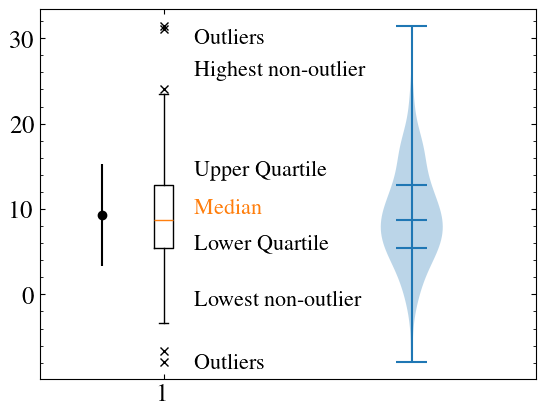

In [4]:

plt.errorbar(0.5,np.mean(data),yerr=np.std(data),fmt='o',c='k')
plt.boxplot(data,flierprops=dict(marker='x'))
plt.violinplot(data, [3], showmedians=True, quantiles=[0.25,0.75])
plt.xlim(0,4)
ax = plt.gca()
plt.text(0.31,0.91,'Outliers',fontsize=16,transform=ax.transAxes)
plt.text(0.31,0.82,'Highest non-outlier',fontsize=16,transform=ax.transAxes)
plt.text(0.31,0.55,'Upper Quartile',fontsize=16,transform=ax.transAxes)
plt.text(0.31,0.45,'Median',fontsize=16,color='C1',transform=ax.transAxes)
plt.text(0.31,0.35,'Lower Quartile',fontsize=16,transform=ax.transAxes)
plt.text(0.31,0.2,'Lowest non-outlier',fontsize=16,transform=ax.transAxes)
plt.text(0.31,0.03,'Outliers',fontsize=16,transform=ax.transAxes)

plt.show()

## Notebook display and saving figures for publications

If you want to save your figures for reports, presentations, publications etc the best way is to use plt.savefig(), rather than plt.show() followed by a screenshot.

With plt.savefig() you can specify the file type, e.g. plt.savefig('example_plot.pdf'). It will create a graphics file of the type based on the file extension of the filename you give it. In general it is better to create a vector graphics file such as a pdf:
 - labels, annotations etc are text searchable
 - there are no pixellation artefacts in the file itself
 - resolution improves as a viewer zooms in

An exception to this would be if you make a scatterplot with huge numbers of points, in which case a pdf file can be very large and take a long time to render. In this case, another format such as png may be more suitable. 

## Histograms

It is very common to show 1D samples as histograms. The data is put into bins, and the number (or density) of data points in the bin is plotted against the bin position. 

If all the bins are equal sizes, then showing the number of points per bin is fine. If not then you **must** show the density instead

### Choices and difficulties

One has to choose:

* How big should the bins be?
* Where do the bins start? (often arbitrary)
* What does one do with points outside the range of bins considered?

Changing these can dramatically affect results, as shown below

### Changing starting point
Below we see the effect of shifting the starting point for the binning, while keeping the bin widths the same. The data appears to change substantially 

In [5]:

def plot_xN_histogram(start, ax, numberbins=10,density=False) :
    '''Plots histogram of data into ax, with stated start point and number of bins'''
    ax.hist(data,bins=np.linspace(start,start+fullwidth,numberbins),density=density)
    ax.set_xlabel('x')
    ax.set_title(f'{numberbins} bins starting at {start}')
    if density==False :
        ax.set_ylabel('N')
    else :
        ax.set_ylabel('f(x)')
    return

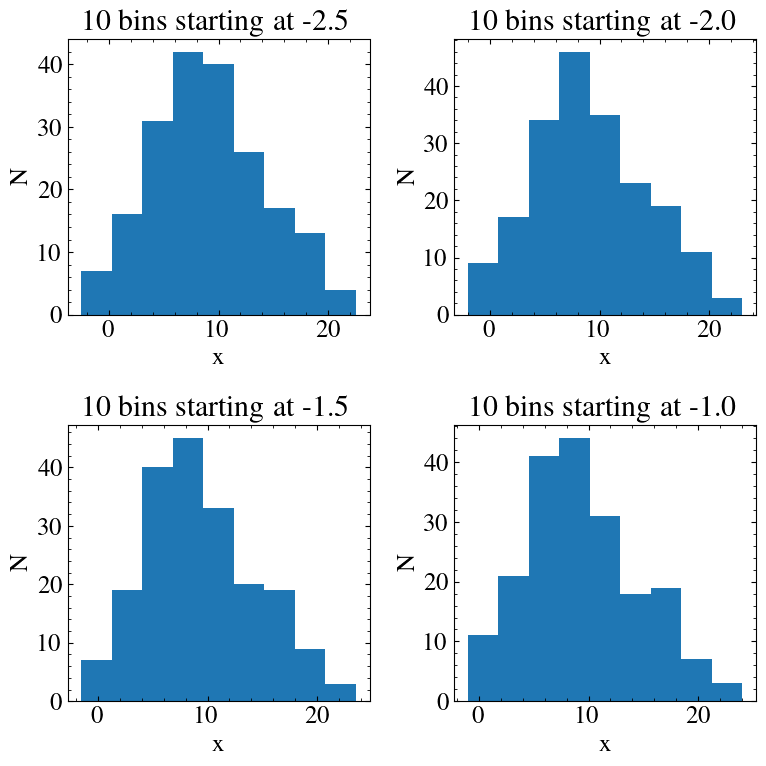

In [6]:
plt.gcf().set_size_inches((8,8))
fullwidth,numberbins,shift,start=25,10,0.5,-2.5

plot_xN_histogram(start,plt.subplot(221))
start += shift
plot_xN_histogram(start,plt.subplot(222))
start += shift
plot_xN_histogram(start,plt.subplot(223))
start += shift
plot_xN_histogram(start,plt.subplot(224))
start += shift
plt.tight_layout()
plt.show()

### Changing bin width

The below histograms differ only in bin width, the data is the same again.

It is generally better to make the
bins too narrow than too wide: the eye can smooth out the noise but cannot recover lost
resolution! Note that the uncertainty of any histogram value $h_i$ is $\sqrt{h_i}$

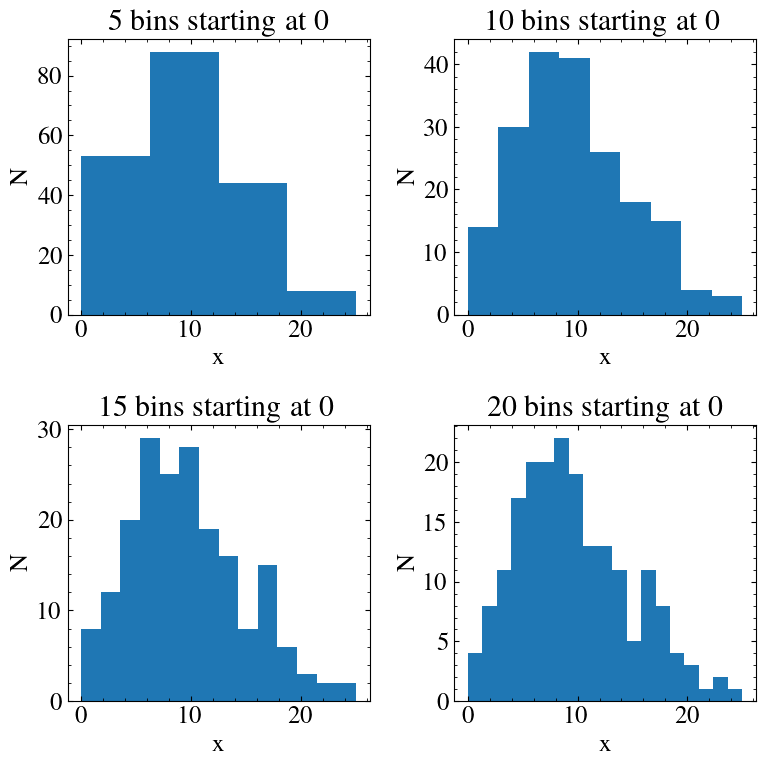

In [7]:
plt.gcf().set_size_inches((8,8))

plot_xN_histogram(0,plt.subplot(221),numberbins=5)
plot_xN_histogram(0,plt.subplot(222),numberbins=10)
plot_xN_histogram(0,plt.subplot(223),numberbins=15)
plot_xN_histogram(0,plt.subplot(224),numberbins=20)
plt.tight_layout()
plt.show()

There are a number of 'rules' for 'ensuring' that you have the 'right' bin width, $\Delta_b$, for your data. Common examples are 

Scott's rule: 
$$\Delta_b = \frac{3.5\sigma}{N^{1/3}}$$

Freedman-Diaconis rule: 
$$\Delta_b = \frac{2[Q(0.75)-Q(0.25)]}{N^{1/3}}$$



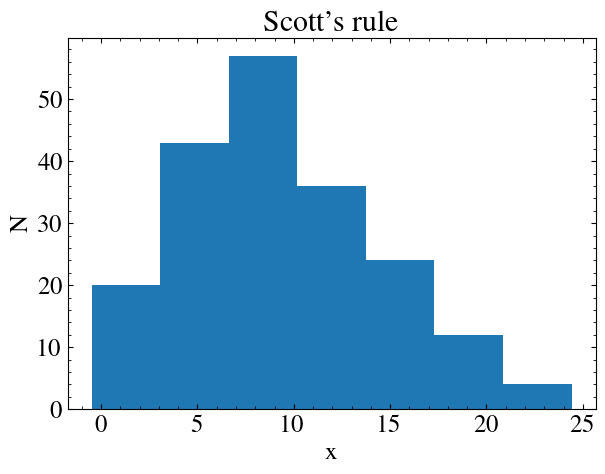

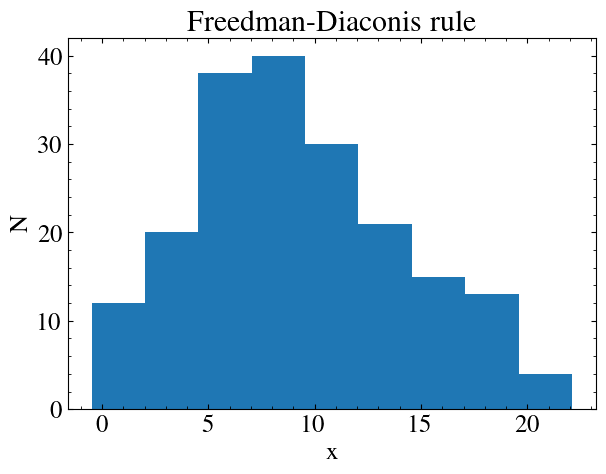

In [8]:
# Scott's rule
width = 3.5*np.std(data)*len(data)**(-1/3)
plt.hist(data,bins=np.arange(start,start+25,width))
plt.xlabel('x'); plt.ylabel('N')
plt.tight_layout()
plt.title("Scott's rule")
plt.show()

# Freedman-Diaconis rule
width = 2*(np.percentile(data,75)-np.percentile(data,25))*len(data)**(-1/3)
plt.hist(data,bins=np.arange(start,start+25,width))
plt.xlabel('x'); plt.ylabel('N')
plt.tight_layout()
plt.title("Freedman-Diaconis rule")
plt.show()

These rules implicitly assume a single peaked distribution, which can lead to too large bins (oversmoothing).

I will briefly note that the same happens with smoothed versions, called kernel density estimates (KDEs), but that is not something we will cover. Although you can choose an adaptive-width kernel for the KDE...


(For more complicated examples, which are more valid for multi-peaked distributions, see Sec 5.7.2 of Ivezić et al where "Knuth's Histograms" and "Bayesian Blocks" are explained. The more simple rules are discussed in Sec 4.8.1)

Usually, it is a **bad idea** to attempt to fit to binned data if you have access to the original unbinned data, since features can depend on the binning. This may be unavoidable though: for example, a detector won't give you the exact (x,y) position and time of every photon that hits it

### Normalization

Note that the above plots all go to very different heights, even though it is the same data - each bar shows the number of points in a given bin, so when the bins shrink, so do the numbers. The way to avoid this is to normalise the histogram such that the area is one - this is then analogous to a pdf. This is **essential** if the bins are of unequal sizes.

In matplotlib the property "density=True" (previously "normed=True") gives a normalised histogram

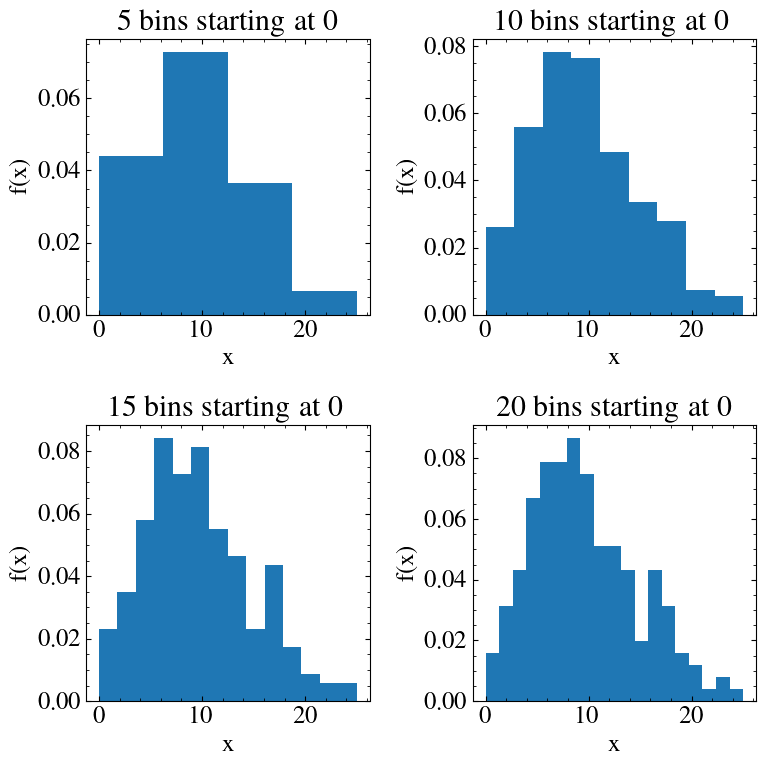

In [9]:
plt.gcf().set_size_inches((8,8))

plot_xN_histogram(0,plt.subplot(221),numberbins=5,density=True)
start += shift
plot_xN_histogram(0,plt.subplot(222),numberbins=10,density=True)
start += shift
plot_xN_histogram(0,plt.subplot(223),numberbins=15,density=True)
start += shift
plot_xN_histogram(0,plt.subplot(224),numberbins=20,density=True)
start += shift
plt.tight_layout()
plt.show()

### Cumulative plots

An alternative is to a histogram is to plot the cumulative fraction, analogous to the
cumulative distribution function. This avoids the loss of detail (but can be harder to interpret by eye)

It is, however, easy to read off the median and other quantiles in a way that isn't the case for a histogram

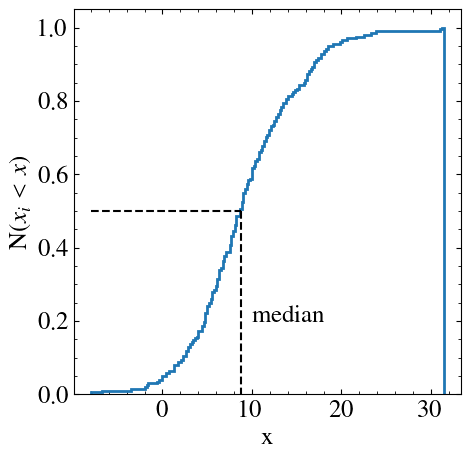

In [10]:
plt.gcf().set_size_inches((5,5))
plt.hist(data,bins=len(data),cumulative=True,density=True,lw=2,histtype='step')
plt.plot([min(data),np.median(data)],[0.5,0.5],'k--')
plt.plot([np.median(data),np.median(data)],[0.5,0],'k--')
plt.text(10,.2,'median')
plt.xlabel('x'); plt.ylabel(r'N($x_i<x$)')
plt.show()

You can also easily rescale the y-axis , if makes visualisation easier. For example, if all the x values are positive, one can use a logarithmic x axis

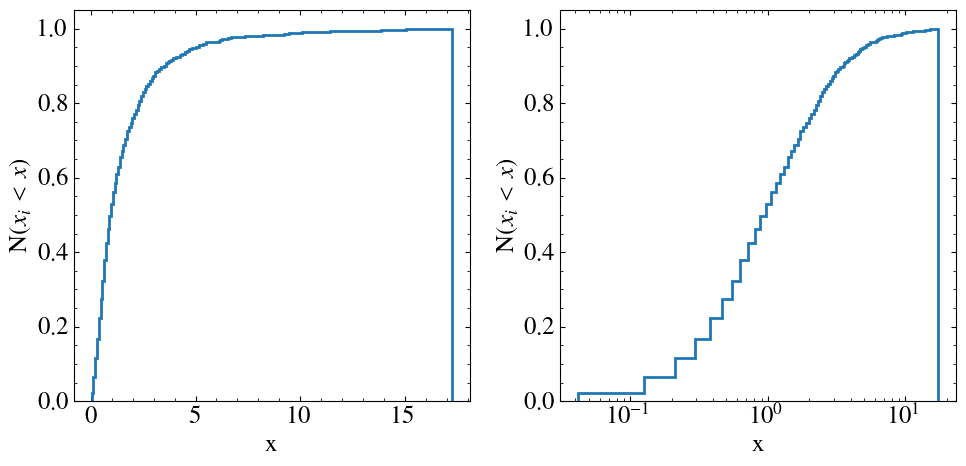

In [11]:
plt.gcf().set_size_inches((10,5))
data_log = np.random.lognormal(size=1000)
plt.subplot(121)
plt.hist(data_log,bins=len(data),cumulative=True,density=True,lw=2,histtype='step')
plt.xlabel('x'); plt.ylabel(r'N($x_i<x$)')
plt.subplot(122)
plt.hist(data_log,bins=len(data),cumulative=True,density=True,lw=2,histtype='step')
plt.xscale('log')
plt.xlabel('x'); plt.ylabel(r'N($x_i<x$)')
plt.tight_layout()
plt.show()

### It is fairly easy to spot from a cumulative distribution whether two samples are drawn from the same population

This may not be true with, for example, means and dispersions, as below

In this case we will compare the data to a flipped version of the data

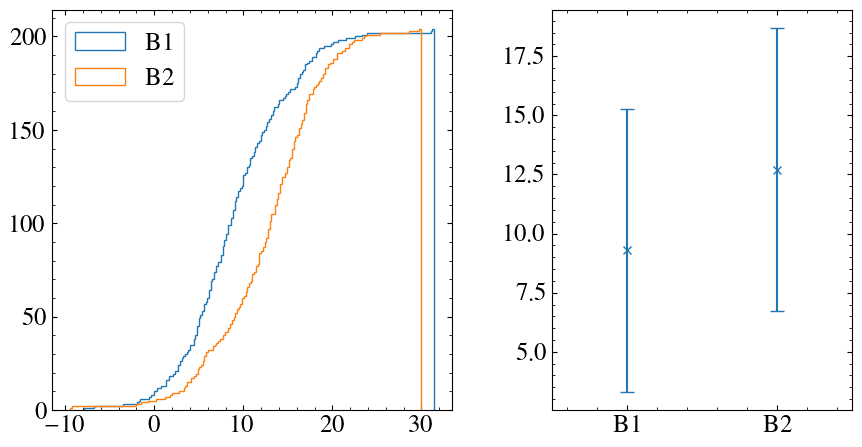

In [12]:
plt.gcf().set_size_inches((10,5))
data2 = 22-data

y    = [np.mean(data), np.mean(data2)]
yerr = [np.std(data),  np.std(data2)]
x = [1,2]

plt.axes([0.1,0.1,0.4,0.8])
plt.hist(data,bins=len(data),cumulative=True,histtype='step',label='B1')
plt.hist(data2,bins=len(data2),cumulative=True,histtype='step',label='B2')
plt.legend(loc='upper left')

plt.axes([0.6,0.1,0.3,0.8])
plt.errorbar(x,y,yerr,ls='none',marker='x',capsize=5)
plt.xlim(0.5,2.5)
plt.xticks([1,2], ['B1','B2'])
plt.show()


This is the basis of the KS-test (Kolmogorov–Smirnov test), which is used to quantify and test this exact question. We will return to it later in the course.

# Scatter plots - useful, but caution required

## Representing 2D data

A common way to represent data where you're interested in how two properties relate to each other is as a scatter plot.

This can be useful, providing that the number of data points is small. We show some examples below using data from Bensby et al (2014), who looked at the chemical abundances of stars in the Solar neighbourhood.

We are particularly interested in the relationship between iron (Fe), which is produced in all supernovae, and titanium (Ti), which is mostly produced in core-collapse supernovae (which occur shortly after stars form).  

In [13]:
def plotBensbyScatters() :
    '''Function which plots some scatter plots using Bensby data'''
    df = pd.read_csv('BensbyAbundancesforASTM29.csv')
    plt.gcf().set_size_inches((12,8))
    plt.subplot(221)
    plt.scatter(df['Fe_H'],df['Ti_Fe'],c='b')
    plt.ylabel('[Ti/Fe]')
    plt.xlabel('[Fe/H]')
    plt.title('Scatter plot')

    plt.subplot(222)
    plt.errorbar(df['Fe_H'],df['Ti_Fe'],df['e_Fe_H'],df['e_Ti_Fe'],c='b',fmt='none')

    plt.scatter(df['Fe_H'],df['Ti_Fe'],c='b')
    plt.ylabel('[Ti/Fe]')
    plt.xlabel('[Fe/H]')
    plt.title('Scatter plot with error bars')


    plt.subplot(223)
    plt.scatter(df['Fe_H'],df['Ti_Fe'], s=df['Age']**2, c='none',edgecolors='b')
    plt.xlabel('[Fe/H]')
    plt.ylabel('[Ti/Fe]')
    msizes = [13, 7, 1]
    markers = []
    for size in msizes:
        markers.append(plt.scatter([],[], s=size**2,  c='none',edgecolors='b', label='%d Gyr' % size))

    plt.legend(handles=markers,loc='upper right',fontsize='small')
    plt.title('Scatter plot with markers indicating ages')

    plt.subplot(224)
    ax = plt.gca()
    plt.text(0.5,1.,'For 100 data points (as here), we can get\n a useful understanding of the data \nfrom a scatterplot ' +
            'especially\n if, as bottom-left, we use the\n markers to give more information about\n the data. ' +
            'However, once we start\n to include uncertainties, even 100\n points can be overcrowded in the plot.',
             horizontalalignment='center', verticalalignment='top', transform=ax.transAxes, wrap=True)

    plt.setp(plt.gca(), frame_on=False, xticks=(), yticks=())

    plt.tight_layout()
    #plt.colorbar()

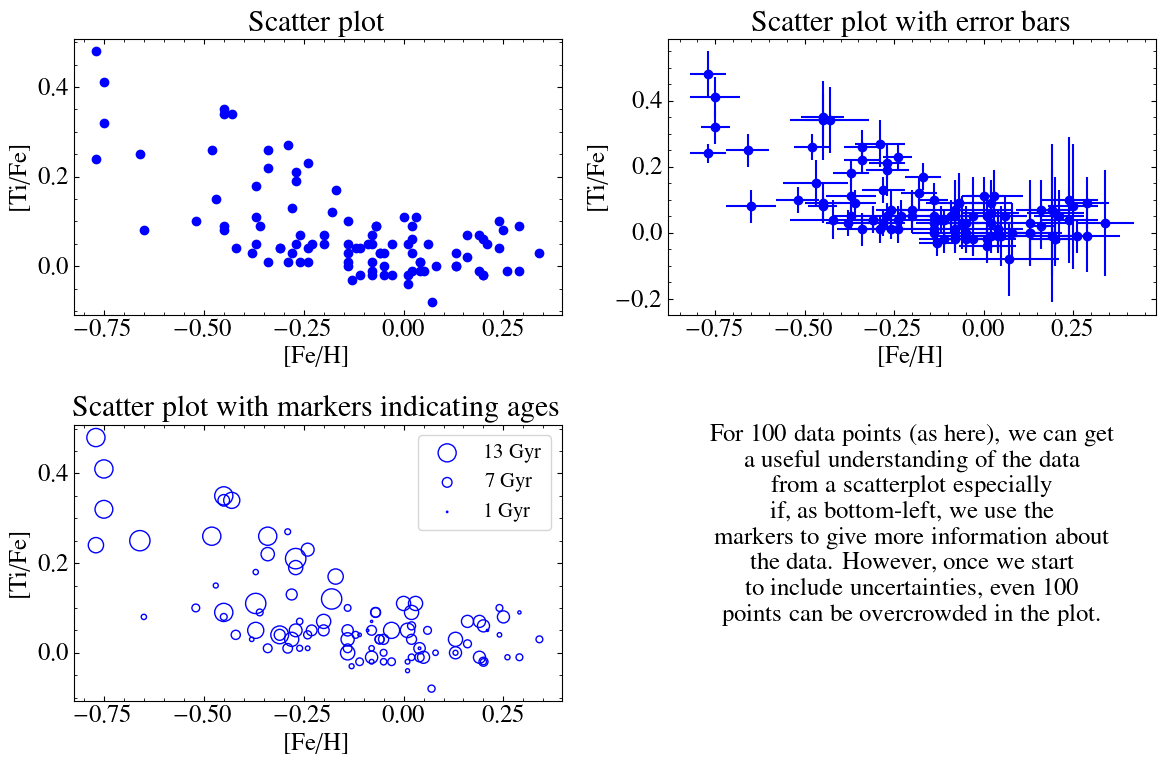

In [14]:
plotBensbyScatters()
plt.show()

# Larger data sets

For larger data sets, for example the colour-absolute magnitude diagram of stars observed by the RAVE survey, scatter plots become much less useful. The data points overlap and we can not get a sense of the _density_ of points

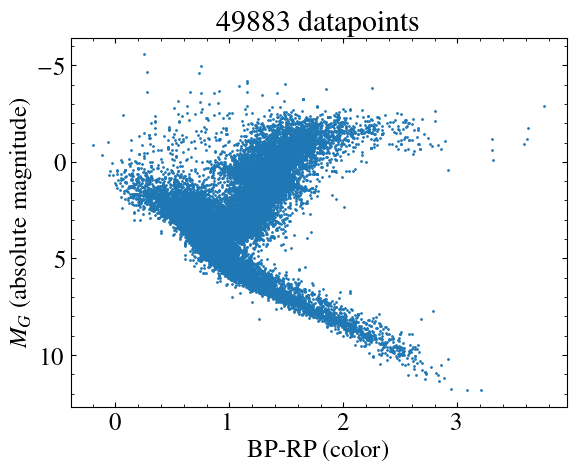

In [15]:

df_tmp = pd.read_csv('RAVEStarsforASTM29.csv')
plt.scatter(df_tmp['bp_rp'],df_tmp['phot_g_mean_mag']-df_tmp['dist_mod_BDASP'],s=1)
ylo,yhi = plt.ylim()
plt.ylim(yhi,ylo)
plt.xlabel('BP-RP (color)')
plt.ylabel('$M_G$ (absolute magnitude)')
plt.title(f'{len(df_tmp)} datapoints')
plt.show()

We have no idea from this plot how the density varies in the solid blue region.

(side note: the y-axis is reversed because astrophysics is sometimes ridiculous)

We can try assigning a transparency to the points by altering their alpha-parameter (alpha=1 is fully opaque)

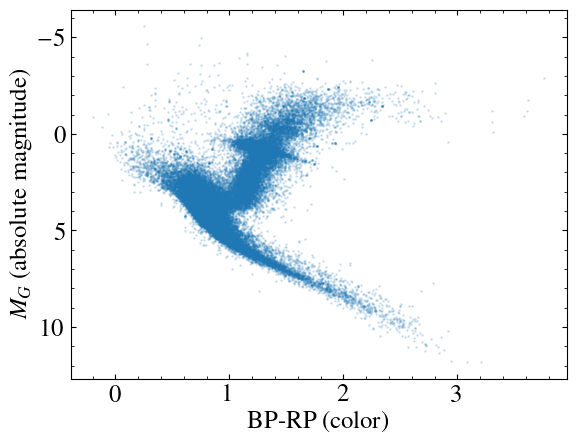

In [16]:

df_tmp = pd.read_csv('RAVEStarsforASTM29.csv')
plt.scatter(df_tmp['bp_rp'],df_tmp['phot_g_mean_mag']-df_tmp['dist_mod_BDASP'],s=1,alpha=0.15)
ylo,yhi = plt.ylim()
plt.ylim(yhi,ylo)
plt.xlabel('BP-RP (color)')
plt.ylabel('$M_G$ (absolute magnitude)')
plt.show()

Changing alpha works for a moderate number of points (notice some structure is now visible in the giant branch), but here much of the plot is still saturated 

## Alternative: Density plot

A better alternative is to compute a 2D histogram (counts of points in 2D bins) and show this. One can use a logarithmic scale for the colour axis if there is a large range of densities to represent.

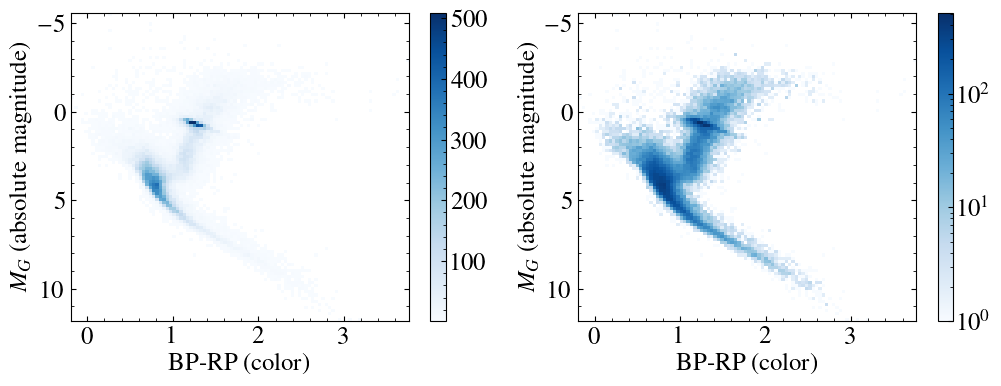

In [17]:

plt.gcf().set_size_inches((12,4))
plt.subplot(121)
plt.hist2d(df_tmp['bp_rp'],df_tmp['phot_g_mean_mag']-df_tmp['dist_mod_BDASP'],
           bins=100,cmap='Blues',cmin=1)

ylo,yhi = plt.ylim()
plt.ylim(yhi,ylo)
plt.xlabel('BP-RP (color)')
plt.ylabel('$M_G$ (absolute magnitude)')
plt.colorbar()

plt.subplot(122)
plt.hist2d(df_tmp['bp_rp'],df_tmp['phot_g_mean_mag']-df_tmp['dist_mod_BDASP'],
           bins=100,norm=mpl.colors.LogNorm(),cmap='Blues')

ylo,yhi = plt.ylim()
plt.ylim(yhi,ylo)
plt.xlabel('BP-RP (color)')
plt.ylabel('$M_G$ (absolute magnitude)')

plt.colorbar()
plt.show()

Now we can see some detail that was completely missed by the scatter plot, including the high density of stars around (1.4,0), known as the red clump, and near the turnoff.